## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

movie_data = pd.read_csv('./tmdb-movies.csv')

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [350]:
#print(movie_data.head())
#print(movie_data.tail())
#print(movie_data.sample())
#print(movie_data.dtypes)
#print(movie_data.isnull().sum())
#print(movie_data.any())
#print(movie_data.describe())

---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [351]:
#movie_data = movie_data.fillna(0)
movie_data = movie_data.dropna(axis=0, how='any')

for col in movie_data.columns:
    coltype = movie_data[col].dtypes
    if coltype == 'int64' or coltype == 'float64':
        movie_data = movie_data[movie_data[col] != 0]
        
movie_data = movie_data.reset_index(drop=True)
#print(movie_data)

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [83]:
#print(movie_data[['id', 'popularity', 'budget', 'runtime', 'vote_average']])
#print(movie_data.loc[:, ['id', 'popularity', 'budget', 'runtime', 'vote_average']])

#print(movie_data.iloc[np.r_[np.arange(1, 21), [48, 49]]])
print(movie_data.loc[[50, 60], ['popularity']])

    popularity
50    2.354654
60    2.026651


---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [92]:
#print(movie_data[movie_data['popularity'] > 5])
#print(movie_data[(movie_data['popularity'] > 5) & (movie_data['release_year'] > 1996)])

         id    imdb_id  popularity     budget     revenue  \
0    135397  tt0369610   32.985763  150000000  1513528810   
1     76341  tt1392190   28.419936  150000000   378436354   
2    262500  tt2908446   13.112507  110000000   295238201   
3    140607  tt2488496   11.173104  200000000  2068178225   
4    168259  tt2820852    9.335014  190000000  1506249360   
5    281957  tt1663202    9.110700  135000000   532950503   
6     87101  tt1340138    8.654359  155000000   440603537   
7    286217  tt3659388    7.667400  108000000   595380321   
8    211672  tt2293640    7.404165   74000000  1156730962   
9    150540  tt2096673    6.326804  175000000   853708609   
10   206647  tt2379713    6.200282  245000000   880674609   
11    76757  tt1617661    6.189369  176000003   183987723   
12   264660  tt0470752    6.118847   15000000    36869414   
13   257344  tt2120120    5.984995   88000000   243637091   
14    99861  tt2395427    5.944927  280000000  1405035767   
15   273248  tt3460252  

---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [354]:
#print(movie_data['revenue'].groupby(movie_data['release_year']).agg('mean'))
#print(movie_data['popularity'].groupby(movie_data['director']).agg('mean').sort_values(ascending=False))

director
Colin Trevorrow                         32.985763
George Miller                           14.675428
Joe Russo|Anthony Russo                 12.971027
Chad Stahelski|David Leitch             11.422751
Don Hall|Chris Williams                  8.691294
Christopher Nolan                        8.635610
Morten Tyldum                            8.110711
Joe Johnston                             7.959228
Lilly Wachowski|Lana Wachowski           7.753899
Kyle Balda|Pierre Coffin                 7.404165
Robert Schwentke                         7.401188
James Gunn                               7.377549
MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein              7.031452
Alan Taylor                              6.883129
Joss Whedon                              6.791347
Pete Docter                              6.326804
Alex Garland                             6.118847
Chris Buck|Jennifer Lee                  6.112766
Luc Besson                               5.947136
Peter Jackson                            

---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

(array([ 0.,  0.,  0.,  5.,  4.,  2.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
         27.,  28.,  29.,  30.,  31.,  32.,  33.]),
 <a list of 28 Patch objects>)

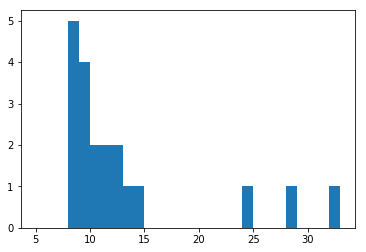

In [355]:
popularity = movie_data.sort_values(by='popularity', ascending=False)[0: 20].reset_index(drop=True)
#print(popularity)
bin_edges = np.arange(5, popularity['popularity'].max() + 1, 1)
plt.hist(data = popularity, x = 'popularity', bins = bin_edges)

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

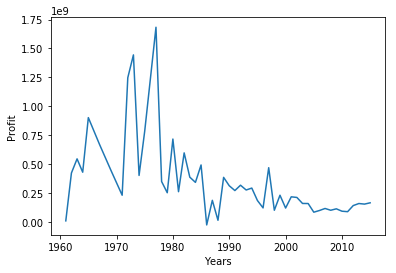

In [356]:
movie_data['profit'] = movie_data['revenue_adj'] - movie_data['budget_adj']
y_means = movie_data['profit'].groupby(movie_data['release_year']).mean()
plt.xlabel("Years")
plt.ylabel("Profit")
plt.plot(y_means.index, y_means)

由上图可知，基本上早发行的电影，其净利润更高。尤其在1980年之前，但波动非常大，参考历史不难发现，当时正处于经济危机。

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

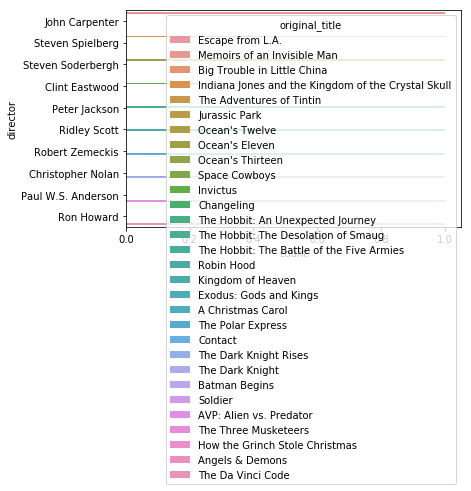

In [357]:
director = movie_data.groupby(movie_data['director']).agg('size').sort_values(ascending=False)[0: 10]

def getDirectorTop3():
    directors_movie_data = pd.DataFrame(columns=movie_data.columns)
    for dirs in director.index:
        director_movie_data = movie_data[ movie_data['director'] == dirs ].sort_values(by='budget_adj', ascending=False)[0: 3]
        directors_movie_data = directors_movie_data.append(director_movie_data)
    return directors_movie_data
    
directors_movie_data = getDirectorTop3()
sb.countplot(y = 'director', hue = 'original_title', data = directors_movie_data)

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

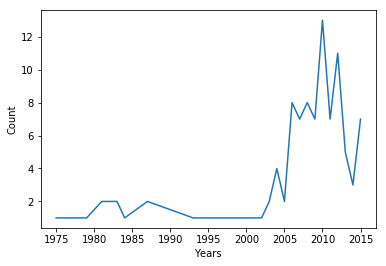

In [358]:
sixmonth_movie_data = movie_data[ movie_data['release_year'].between(1968, 2015) ]
def isJune(x):
    return x.split('/')[0] == '6'
sixmonth_movie_data = sixmonth_movie_data[sixmonth_movie_data['release_date'].apply(lambda x: isJune(x))]

y_means = sixmonth_movie_data.groupby(movie_data['release_year']).size()
plt.xlabel("Years")
plt.ylabel("Count")
plt.plot(y_means.index, y_means)
#print(sixmonth_movie_data)

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

C:\Users\zhong\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\zhong\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


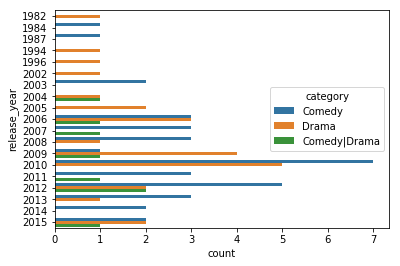

In [359]:
import re
def isComedyADrama(x):
    if (re.search('Comedy|Drama', x, re.M|re.I) is None):
        return False
    return True
sixmonth_comedyAdrama_movie_data = sixmonth_movie_data[sixmonth_movie_data['genres'].apply(lambda x: isComedyADrama(x))]

def getCatetory(x):
    isComedy = not re.search('Comedy', x) is None
    isDrama = not re.search('Drama', x) is None
    if isDrama and isComedy:
        return 'Comedy|Drama'
    if isComedy:
        return 'Comedy'
    if isDrama:
        return 'Drama'

# 这块warning按照文档提示修改过了，还是有。。。求助。
#sixmonth_comedyAdrama_movie_data['category'] = sixmonth_comedyAdrama_movie_data['genres'].apply(lambda x: getCatetory(x))
sixmonth_comedyAdrama_movie_data.loc[:, 'category'] = sixmonth_comedyAdrama_movie_data['genres'].apply(lambda x: getCatetory(x))
#print(sixmonth_comedyAdrama_movie_data)
sb.countplot(y = 'release_year', hue = 'category', data = sixmonth_comedyAdrama_movie_data)

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。